<a href="https://colab.research.google.com/github/drdssouza/Curso---Machine-Learning-Sistema-de-Recomenda-o-com-python/blob/main/Machine_Learning_Sistema_de_Recomenda%C3%A7%C3%A3o_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem dos dados



Importação e configuração das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

plt.rcParams['figure.figsize']=(15,6)
plt.style.use('seaborn-darkgrid')

Leitura dos dados

In [3]:
dadoslivros=pd.read_csv("Books.csv")
dadosavaliacao=pd.read_csv("Ratings.csv")
dadosusuario=pd.read_csv("Users.csv")

dadoslivros.shape, dadosavaliacao.shape, dadosusuario.shape

((121164, 8), (1149780, 3), (278858, 3))

In [4]:
dadoslivros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
dadoslivros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121164 entries, 0 to 121163
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 121164 non-null  object
 1   Book-Title           121164 non-null  object
 2   Book-Author          121164 non-null  object
 3   Year-Of-Publication  121164 non-null  int64 
 4   Publisher            121164 non-null  object
 5   Image-URL-S          121164 non-null  object
 6   Image-URL-M          121164 non-null  object
 7   Image-URL-L          121163 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.4+ MB


In [6]:
dadosavaliacao.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
dadosavaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
dadosusuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
dadosusuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Cruzamento dos dados**

In [14]:
tab_cruzada = dadoslivros.merge(dadosavaliacao,how='inner',on='ISBN')
tab_cruzada = tab_cruzada.merge(dadosusuario,how='inner',on='User-ID')

In [15]:
tab_cruzada.shape

(807317, 12)

In [16]:
tab_cruzada.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [17]:
tab_cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807317 entries, 0 to 807316
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 807317 non-null  object 
 1   Book-Title           807317 non-null  object 
 2   Book-Author          807317 non-null  object 
 3   Year-Of-Publication  807317 non-null  int64  
 4   Publisher            807317 non-null  object 
 5   Image-URL-S          807317 non-null  object 
 6   Image-URL-M          807317 non-null  object 
 7   Image-URL-L          807316 non-null  object 
 8   User-ID              807317 non-null  int64  
 9   Book-Rating          807317 non-null  int64  
 10  Location             807317 non-null  object 
 11  Age                  587483 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 80.1+ MB


**Converter a coluna Ano**

In [20]:
# Arrumando valores incorretos
tab_cruzada.iloc[287500,3]=''
tab_cruzada.iloc[352361,3]=''
tab_cruzada.iloc[467962,3]=''
tab_cruzada.iloc[469216,3]=''

In [21]:
tab_cruzada['Year-Of-Publication']=pd.to_numeric(tab_cruzada['Year-Of-Publication'])

**Tratamento de texto**

In [24]:
def extrair_pais(regiao):
  registro = regiao
  registro = regiao.split(',')
  fracao = registro[-1].upper()
  return fracao

tab_cruzada['Pais']=tab_cruzada['Location'].apply(extrair_pais)

**Renomear Colunas**

In [26]:
tab_cruzada.rename(
    columns={
        'Book-Title': 'Titulo',
        'Book-Author': 'Autor',
        'Year-Of-Publication':'Ano_Publicacao',
        'User-ID':'Id_Cliente',
        'Book-Rating':'Avaliacao',
        'Location':'Localizacao',
        'Age':'Idade'
    }, inplace=True
)
tab_cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

# Visualização dos Dados

Explorando os dados

In [27]:
tab_cruzada.describe()

,Ano_Publicacao,Id_Cliente,Avaliacao,Idade
count,807313.000000,807317.000000,807317.00000,587483.000000
mean,1969.893286,134767.097976,2.86652,37.158219
std,225.844552,83787.646911,3.86753,14.220254
min,0.000000,2.000000,0.00000,0.000000
25%,1992.000000,56271.000000,0.00000,28.000000
50%,1997.000000,131182.000000,0.00000,35.000000
75%,2001.000000,209174.000000,7.00000,45.000000
max,2050.000000,278854.000000,10.00000,244.000000


Remover as avaliações zeradas

In [29]:
tab_cruzada =tab_cruzada.loc[tab_cruzada['Avaliacao']> 0]

Análise gráfica

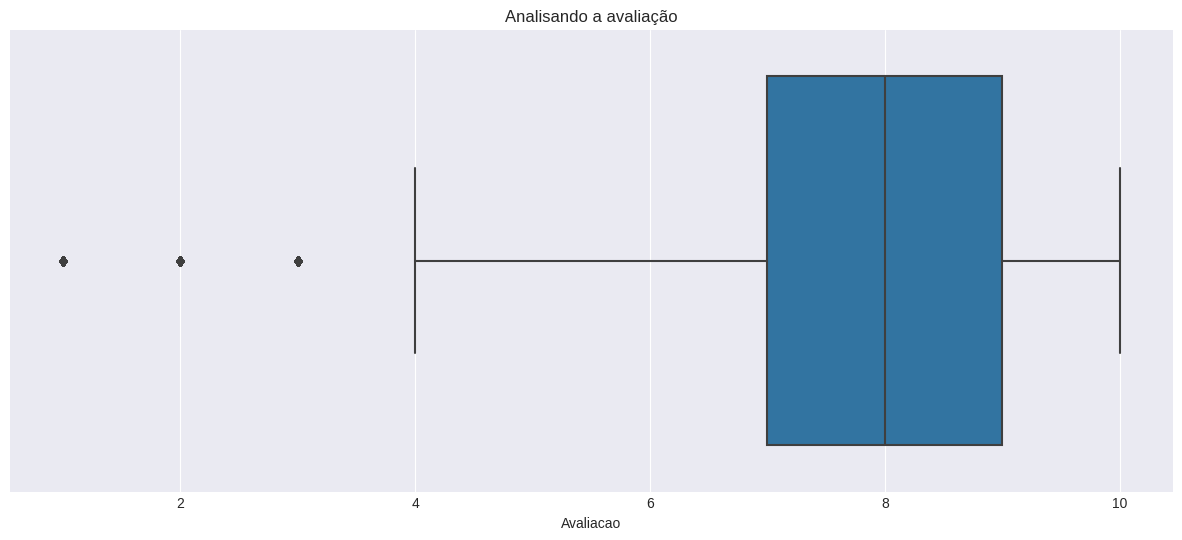

In [30]:
plt.title('Analisando a avaliação')
sns.boxplot(data=tab_cruzada, x='Avaliacao');

In [31]:
analise = tab_cruzada.groupby(by=['Titulo']).agg(
    qtd = ('Titulo', 'count'),
    media = ('Avaliacao', 'mean'),
    mediana = ('Avaliacao', 'median'),
    min = ('Avaliacao', 'min'),
    max = ('Avaliacao', 'max'),
)

analise.head(10)

,qtd,media,mediana,min,max
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9.0,9,9
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,7.0,1,10
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10.0,10,10
Flight of Fancy: American Heiresses (Zebra Ballad Romance),1,8.000000,8.0,8,8
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",4,8.000000,7.5,7,10
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",1,5.000000,5.0,5,5
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),5,7.000000,7.0,5,9
"Q-Space (Star Trek The Next Generation, Book 47)",4,8.250000,9.0,5,10
"Q-Zone (Star Trek The Next Generation, Book 48)",2,5.500000,5.5,5,6


In [33]:
analise.sort_values('qtd', ascending=False).head()

,qtd,media,mediana,min,max
Titulo,,,,,
The Lovely Bones: A Novel,707,8.185290,8.0,1,10
Wild Animus,581,4.390706,4.0,1,10
The Da Vinci Code,493,8.436105,9.0,1,10
The Secret Life of Bees,404,8.470297,9.0,2,10
The Nanny Diaries: A Novel,393,7.437659,8.0,1,10


In [34]:
analise.sort_values(['media','qtd'], ascending=False).head()

,qtd,media,mediana,min,max
Titulo,,,,,
Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10.0,10.0,10,10
The Sneetches and Other Stories,8,10.0,10.0,10,10
Natural California: A Postcard Book,7,10.0,10.0,10,10
Uncle John's Supremely Satisfying Bathroom Reader (Uncle John's Bathroom Reader),7,10.0,10.0,10,10
"Oh, the Thinks You Can Think! (I Can Read It All by Myself Beginner Books)",6,10.0,10.0,10,10


In [36]:
px.scatter(
    data_frame = analise,
    x='qtd', y='media',
    title='Media x Quantidade - Titulos'
)

In [38]:
analise.corr()

,qtd,media,mediana,min,max
qtd,1.000000,0.026886,0.048923,-0.291692,0.204476
media,0.026886,1.000000,0.982213,0.777062,0.842076
mediana,0.048923,0.982213,1.000000,0.716642,0.836920
min,-0.291692,0.777062,0.716642,1.000000,0.360098
max,0.204476,0.842076,0.836920,0.360098,1.000000


In [41]:
analise['qtd'].describe()

count    74013.000000
mean         4.087052
std         12.116436
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        707.000000
Name: qtd, dtype: float64

In [49]:
def classificacao_qtd (qtd):
  if int(qtd)<=5:
    return '1-5 avaliações'

  elif int(qtd)<=10:
    return '6-10 avaliações'

  elif int(qtd)<=100:
    return '11-100 avaliaçoes'

  else:
    return '+100 avaliações'

pizza = analise['qtd'].apply(classificacao_qtd).value_counts(normalize=True)

pizza = pd.DataFrame(pizza).reset_index()

px.pie(
    data_frame=pizza,
    names ='index', values='qtd',
    title='divisao das qtd'
)


In [51]:
analise_ano = tab_cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()
analise_ano.head()

,index,Ano_Publicacao
0,0.0,4393
1,1902.0,2
2,1904.0,1
3,1911.0,2
4,1920.0,33


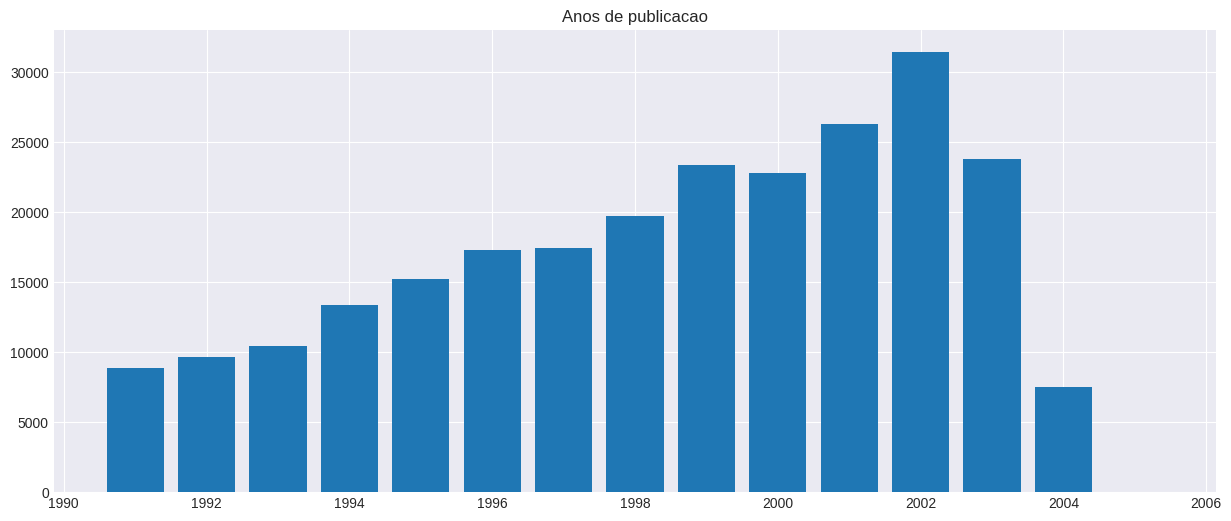

In [57]:
filtro = analise_ano.loc[(analise_ano['index']>1990) & (analise_ano['index']<2020)]

plt.title('Anos de publicacao')
plt.bar(filtro['index'], filtro['Ano_Publicacao']);

In [59]:
tab_cruzada.groupby(by='Autor').agg(
    qtd = ('Avaliacao', 'count'),
    media = ('Avaliacao', 'mean'),
).sort_values('qtd', ascending = False).head(10)

,qtd,media
Autor,,
Stephen King,4464,7.853047
Nora Roberts,2845,7.622496
John Grisham,2512,7.521099
James Patterson,2359,7.694786
J. K. Rowling,1720,8.973837
Mary Higgins Clark,1616,7.532178
Janet Evanovich,1477,7.949221
Dean R. Koontz,1460,7.568493
Sue Grafton,1210,7.727273


In [60]:
tab_cruzada['Pais'].value_counts(normalize=True).head(10)*100

 USA               69.729748
 CANADA             9.258996
 UNITED KINGDOM     3.681383
                    2.895585
 GERMANY            2.742194
 N/A                1.755070
 AUSTRALIA          1.666474
 SPAIN              1.553414
 FRANCE             1.068117
 PORTUGAL           0.863155
Name: Pais, dtype: float64

In [61]:
tab_cruzada['Pais'].value_counts(normalize=True).cumsum().head(10)*100

 USA               69.729748
 CANADA            78.988744
 UNITED KINGDOM    82.670127
                   85.565712
 GERMANY           88.307906
 N/A               90.062976
 AUSTRALIA         91.729450
 SPAIN             93.282864
 FRANCE            94.350981
 PORTUGAL          95.214136
Name: Pais, dtype: float64

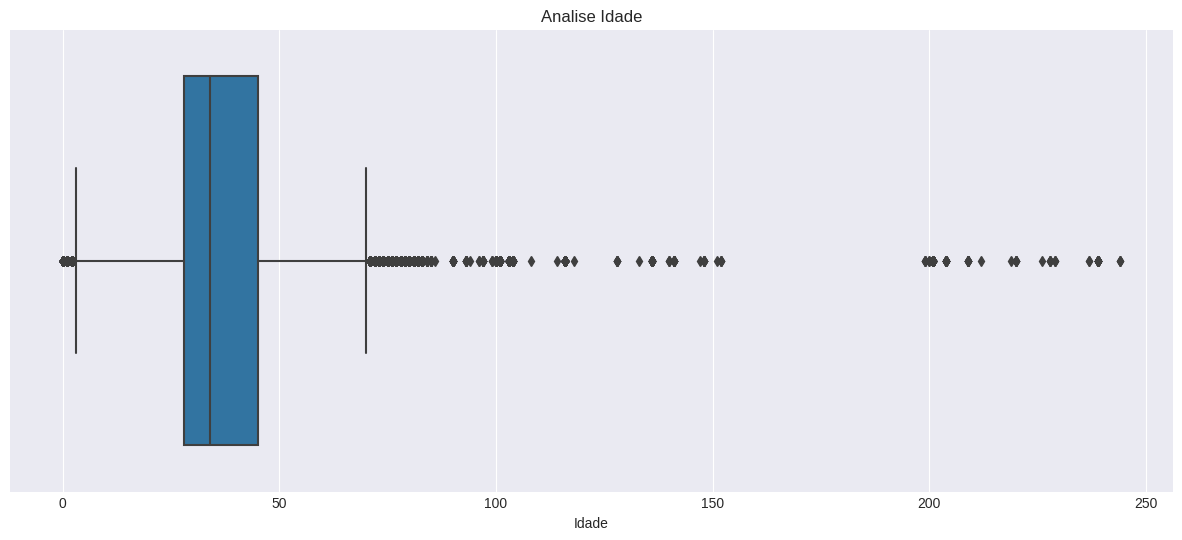

In [62]:
plt.title('Analise Idade')
sns.boxplot(data=tab_cruzada,x='Idade');

# Construção do Modelo

In [66]:
avaliacoes = analise.reset_index().iloc[:,0:2]

In [67]:
tab_final = tab_cruzada.merge(avaliacoes, how='inner', on='Titulo')

tab_final.head()

,ISBN,Titulo,Autor,Ano_Publicacao,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Id_Cliente,Avaliacao,Localizacao,Idade,Pais,qtd
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA,9
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,N/A,9
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8,"toronto, ontario, canada",30.0,CANADA,9
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9,"ottawa, ,",NaN,,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9,"kingston, ontario, canada",NaN,CANADA,9


In [72]:
livros_avaliados = tab_final.loc[(tab_final['qtd']>=50)]

In [74]:
matriz = livros_avaliados.pivot_table(values='Avaliacao', index='Titulo', columns='Id_Cliente')
matriz.fillna(0,inplace=True)
matriz.head()

Id_Cliente,9,16,26,32,42,51,91,97,99,114,125,165,169,183,185,224,226,242,243,244,254,256,272,280,332,...,278586,278633,278641,278645,278653,278663,278672,278683,278698,278723,278732,278740,278755,278773,278786,278798,278800,278824,278828,278832,278836,278843,278844,278846,278854
Titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transformação para vetores

In [76]:
from scipy.sparse import csc_matrix
matriz_sparse= csc_matrix(matriz)
matriz_sparse

<643x24704 sparse matrix of type '<class 'numpy.float64'>'
	with 64325 stored elements in Compressed Sparse Column format>

In [77]:
csc_matrix((4,4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

Criação do modelo

In [86]:
from sklearn.neighbors import NearestNeighbors

modelo = NearestNeighbors(
    n_neighbors=10,
    algorithm='brute',
    metric='minkowski'
)

modelo.fit(matriz_sparse)

NearestNeighbors(algorithm='brute', n_neighbors=10)

Recomendações

In [80]:
for Posicao, Titulo in enumerate(matriz.index):
  if 'Harry' in Titulo:
    print( Posicao, Titulo)

212 Harry Potter and the Chamber of Secrets (Book 2)
213 Harry Potter and the Goblet of Fire (Book 4)
214 Harry Potter and the Order of the Phoenix (Book 5)
215 Harry Potter and the Prisoner of Azkaban (Book 3)
216 Harry Potter and the Sorcerer's Stone (Book 1)
217 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [87]:
selecionar_livro = matriz.iloc[213,:].values.reshape(1,-1)

distancia,recomendacao = modelo.kneighbors(selecionar_livro)

for Loop in range(len(recomendacao)):
  print(matriz.index[recomendacao[Loop]])

Index(['Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)', '4 Blondes',
       'My Gal Sunday', 'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Four Blondes', 'Don't Stand Too Close to a Naked Man',
       'Full Tilt (Janet Evanovich's Full Series)', 'Wifey',
       'Breath, Eyes, Memory'],
      dtype='object', name='Titulo')


In [85]:
recomendacao

array([[213, 215,   3, 307]])